In [ ]:
1. Importing libraries and data and renaming columns

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [16]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.
%matplotlib inline

In [17]:
# Import the cleaned “world_university_ranking.csv” file
df_ranking = pd.read_csv(r'C:\Users\49157\Downloads\Data analysis course\Advanced analytics and dashboard designs\World University Rankings\Rankings_data_cleaned.csv', index_col = False)

In [42]:
df_ranking.shape

(2199, 14)

In [43]:
df_ranking.head()

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,year
0,1,Harvard University,USA,1,7,9,1,1,1,1,1.0,5,100.00,2012
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,2.0,1,91.67,2012
2,3,Stanford University,USA,3,17,11,5,4,2,2,4.0,15,89.50,2012
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,13.0,50,86.17,2012
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,24.5,18,85.21,2012


In [18]:
# Checking and removing some columns because we need the numerical columns
df_ranking.columns

Index(['world_rank', 'institution', 'country', 'national_rank',
       'quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents',
       'score', 'year'],
      dtype='object')

In [19]:
# Create a subset excluding categorical variables
sub = df_ranking[['world_rank','quality_of_education', 'alumni_employment', 'quality_of_faculty',
       'publications', 'influence', 'citations', 'broad_impact', 'patents','score']]

In [20]:
sub

,world_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score
0,1,7,9,1,1,1,1,1.0,5,100.00
1,2,9,17,3,12,4,4,2.0,1,91.67
2,3,17,11,5,4,2,2,4.0,15,89.50
3,4,10,24,4,16,16,11,13.0,50,86.17
4,5,2,29,7,37,22,22,24.5,18,85.21
...,...,...,...,...,...,...,...,...,...,...
2194,996,367,567,218,926,845,812,969.0,816,44.03
2195,997,236,566,218,997,908,645,981.0,871,44.03
2196,998,367,549,218,830,823,812,975.0,824,44.03
2197,999,367,567,218,886,974,812,975.0,651,44.02


In [ ]:
2. The Elbow Technique

In [22]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [23]:
score = [kmeans[i].fit(sub).score(sub) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

C:\Users\49157\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\49157\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\49157\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\49157\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\49157\anaconda3\Lib\site-packages\sklearn\clust

[-1243803474.3112924,
 -466487295.36850154,
 -324204111.147939,
 -274026879.60369164,
 -247403832.71289125,
 -225132457.2145926,
 -208633608.44041756,
 -197112703.74079177,
 -186943454.85638013]

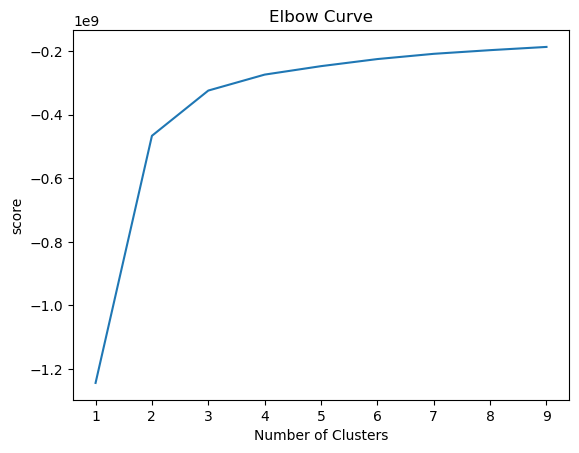

In [24]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('score')
pl.title('Elbow Curve')
pl.show()

# Based on the elbow curve plotted, the optimal number of clusters for the k-means algorithm is 3. We can observe that there is a large jump from 2 to 3 clusters on the x-axis, which reflects a substantial improvement in the clustering performance. This jump signifies that 3 clusters capture the data structure much better than 2 clusters. After the third cluster, the curve straightens out. This flattening suggests that adding more clusters beyond 3 does not lead to a significant reduction in within-cluster variance. 

In [ ]:
3. K-means clustering

In [25]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [26]:
# Fit the k-means object to the data.

kmeans.fit(sub)

C:\Users\49157\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [27]:
sub['clusters'] = kmeans.fit_predict(sub)

C:\Users\49157\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\49157\AppData\Local\Temp\ipykernel_19896\3683309691.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub['clusters'] = kmeans.fit_predict(sub)


In [28]:
sub.head()

,world_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,broad_impact,patents,score,clusters
0,1,7,9,1,1,1,1,1.0,5,100.00,2
1,2,9,17,3,12,4,4,2.0,1,91.67,2
2,3,17,11,5,4,2,2,4.0,15,89.50,2
3,4,10,24,4,16,16,11,13.0,50,86.17,2
4,5,2,29,7,37,22,22,24.5,18,85.21,2


In [30]:
sub['clusters'].value_counts()

clusters
1    812
2    708
0    679
Name: count, dtype: int64

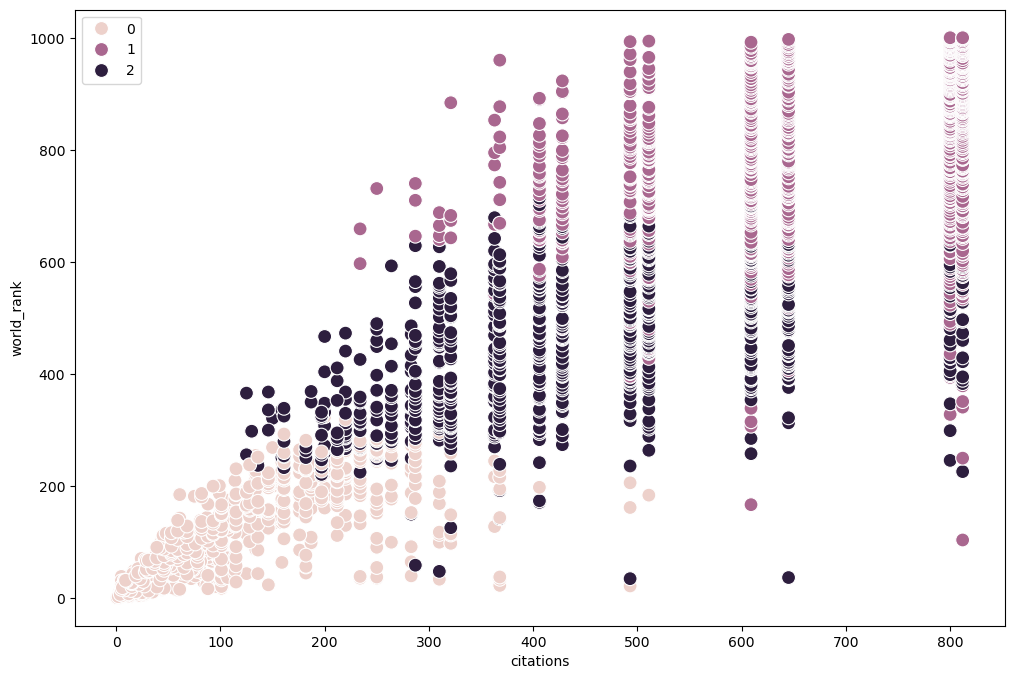

In [56]:
# Plot the clusters for the "world_rank" and "citations" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['citations'], y=sub['world_rank'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('citations') # Label x-axis.
plt.ylabel('world_rank') # Label y-axis.
plt.show()

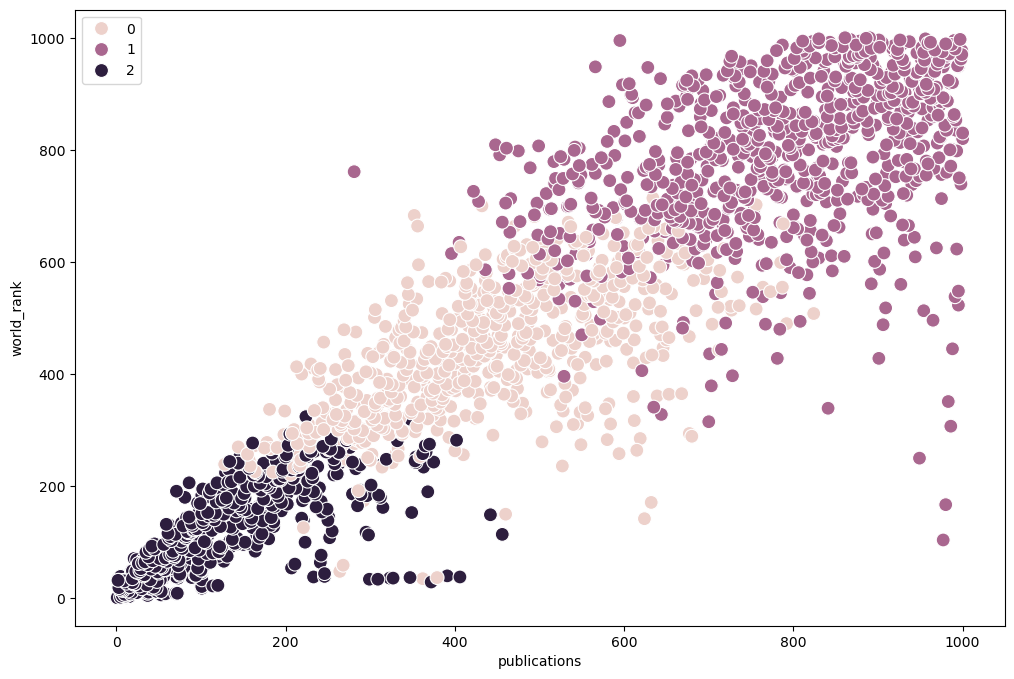

In [33]:
# Plot the clusters for the "publications" and "world_rank" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['publications'], y=sub['world_rank'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('publications') 
plt.ylabel('world_rank') 

# Save the plot to the specified path
plt.savefig(r'C:\Users\49157\Downloads\Data analysis course\Advanced analytics and dashboard designs\World University Rankings\cluster_analysis.png')

plt.show()

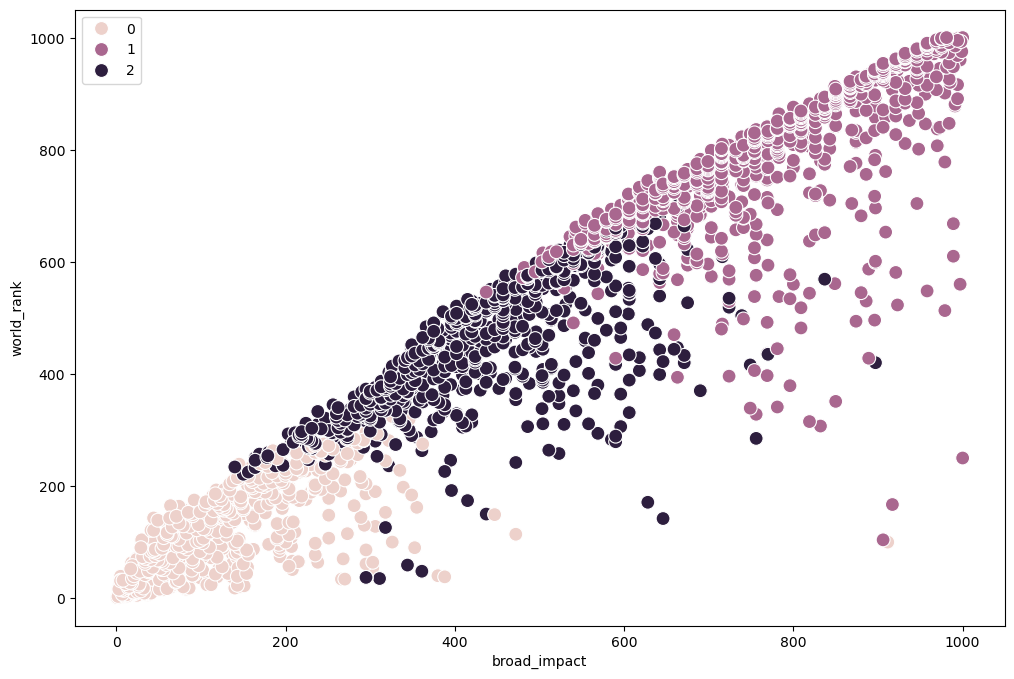

In [58]:
# Plot the clusters for the "broad_impact" and "world_rank" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['broad_impact'], y=sub['world_rank'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('broad_impact') 
plt.ylabel('world_rank') 
plt.show()

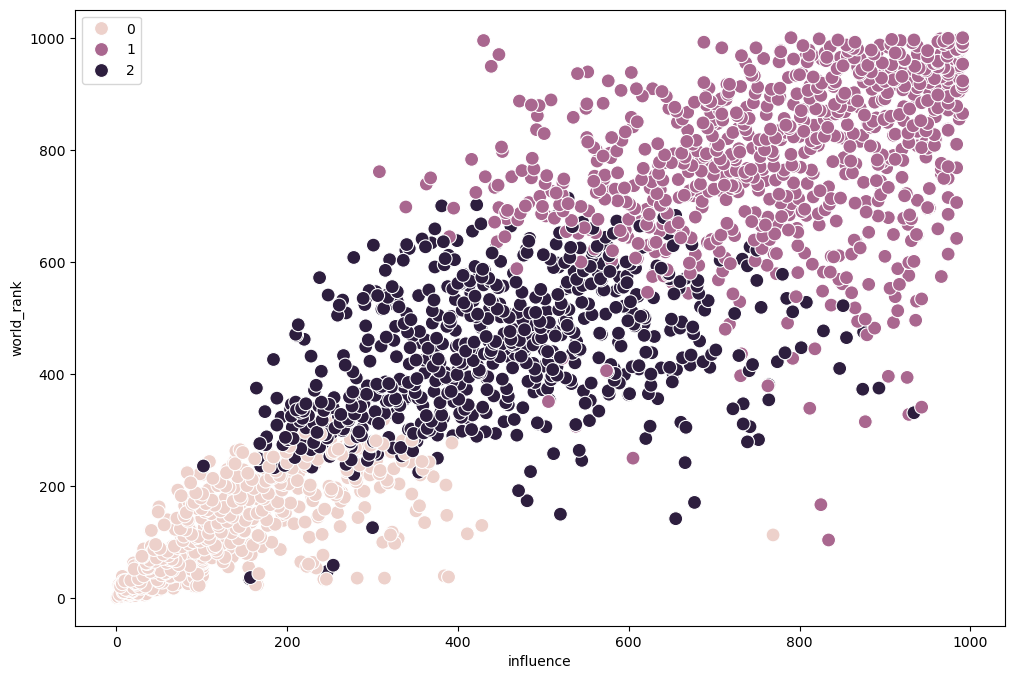

In [59]:
# Plot the clusters for the "influence" and "world_rank" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['influence'], y=sub['world_rank'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('influence') 
plt.ylabel('world_rank') 
plt.show()

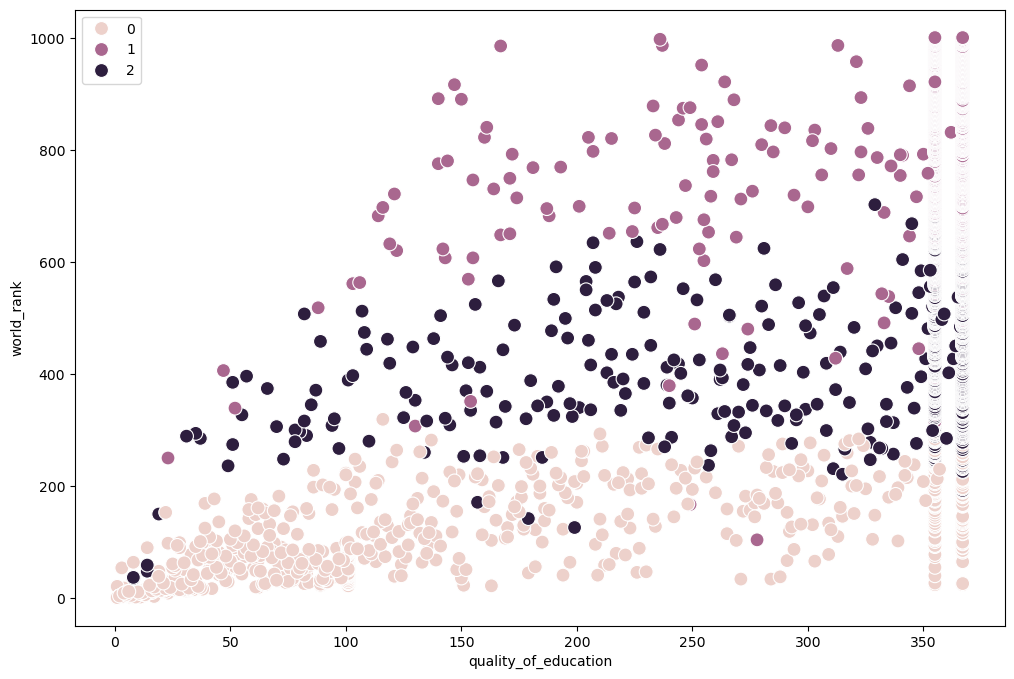

In [60]:
# Plot the clusters for the "quality of education" and "world_rank" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['quality_of_education'], y=sub['world_rank'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('quality_of_education') 
plt.ylabel('world_rank') 
plt.show()

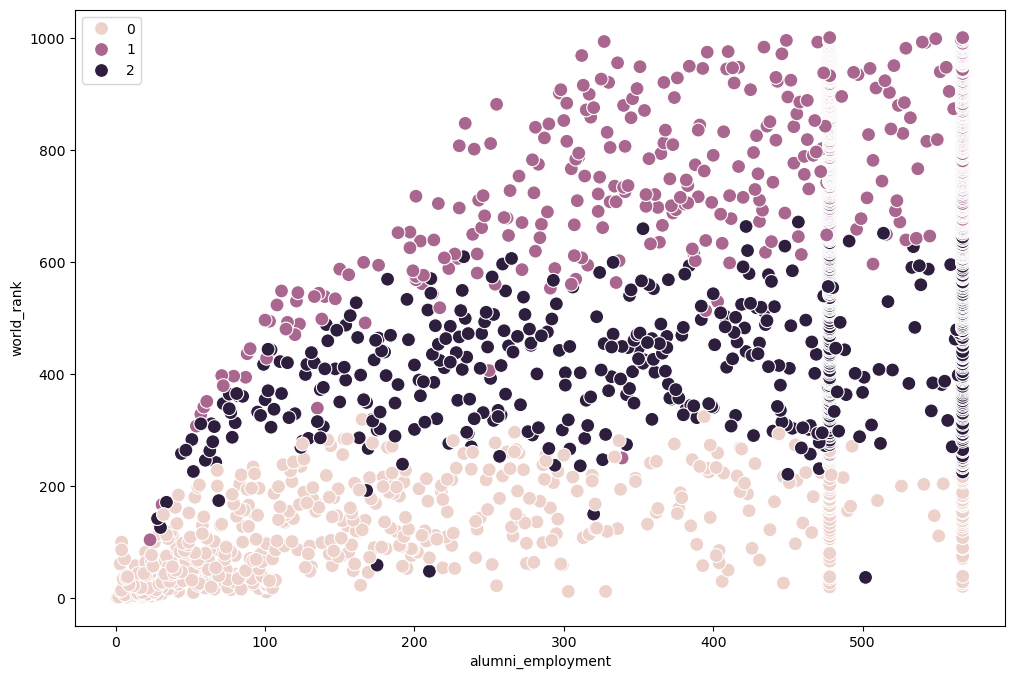

In [61]:
# Plot the clusters for the "alumni employment" and "world_rank" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['alumni_employment'], y=sub['world_rank'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('alumni_employment') 
plt.ylabel('world_rank') 
plt.show()

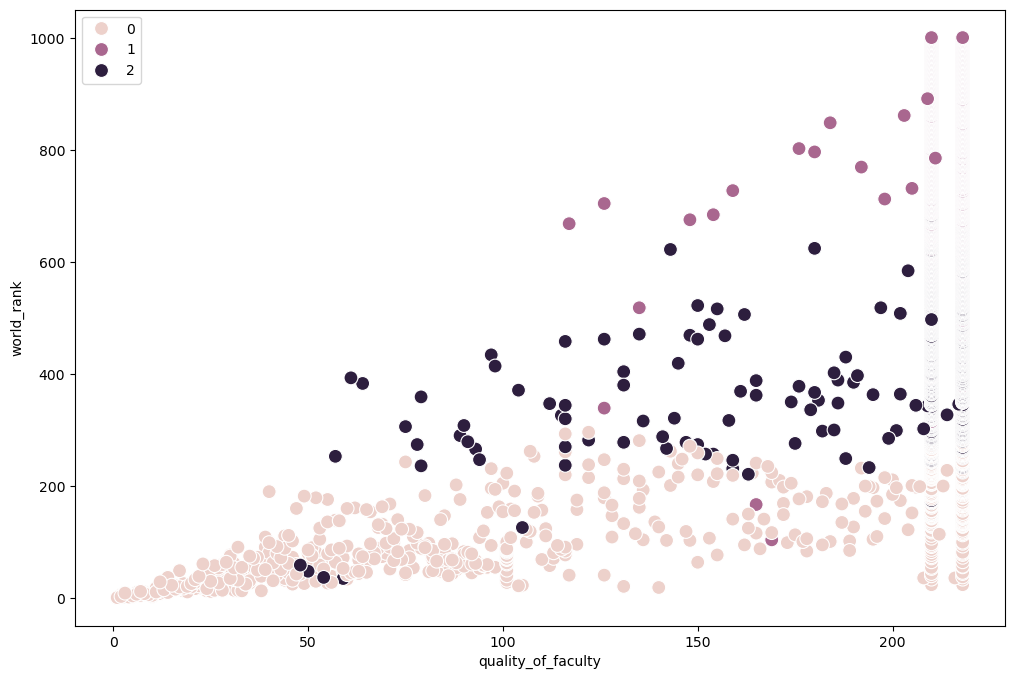

In [62]:
# Plot the clusters for the "quality of faculty" and "world_rank" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['quality_of_faculty'], y=sub['world_rank'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('quality_of_faculty') 
plt.ylabel('world_rank') 
plt.show()

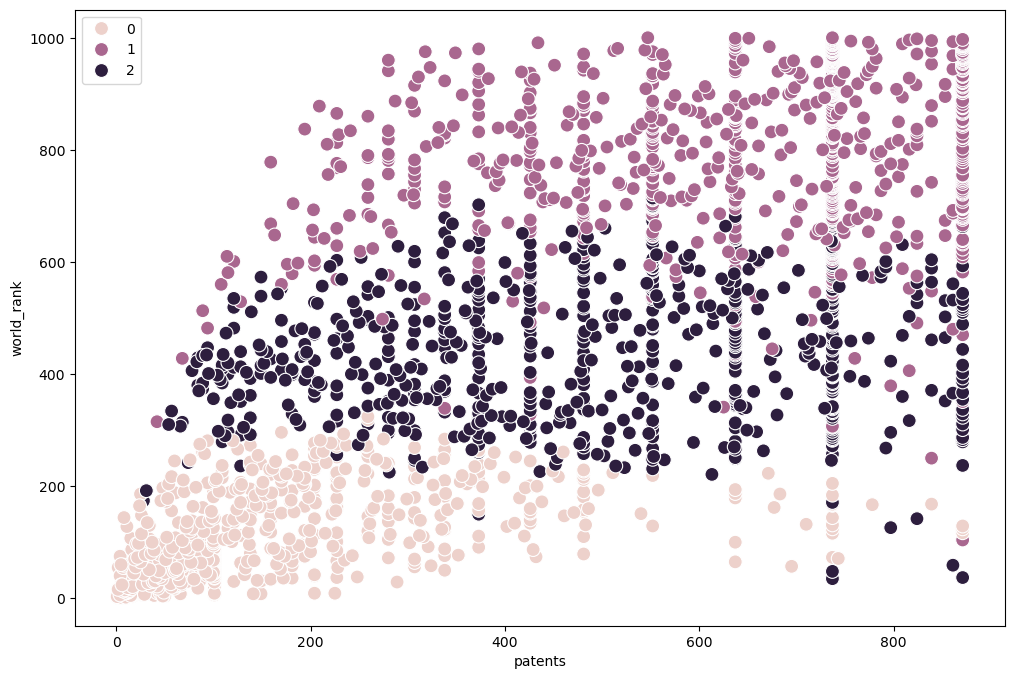

In [63]:
# Plot the clusters for the "patents" and "world_rank" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=sub['patents'], y=sub['world_rank'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('patents') 
plt.ylabel('world_rank') 
plt.show()

# # Based on the k-means clustering against various variables (publications, citations, influence, broad impact, quality of education, alumni emoloyment, quality of faculty, patents, and world rank), we can observe consistent clustering patterns, which indicates insightful meaningful groupings. The clusters are as follows: Cluster 1 with 809 points, Cluster 0 with 708 points, and Cluster 2 with 682 points. 

In [64]:
sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'
sub.loc[sub['clusters'] == 1, 'cluster'] = 'purple'
sub.loc[sub['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\49157\AppData\Local\Temp\ipykernel_57660\749661046.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub.loc[sub['clusters'] == 2, 'cluster'] = 'dark purple'


In [65]:
sub.groupby('cluster').agg({'world_rank':['mean', 'median'],
                         'quality_of_education':['mean', 'median'], 
                         'alumni_employment':['mean', 'median'], 
                         'quality_of_faculty':['mean', 'median'],
                          'publications':['mean', 'median'],
                          'influence':['mean', 'median'],
                         'citations':['mean', 'median'],
                          'broad_impact':['mean', 'median'],
                           'patents':['mean', 'median'],
                           'score':['mean', 'median']})

world_rank        quality_of_education        alumni_employment  \
                   mean median                 mean median              mean   
cluster                                                                        
dark purple  435.353372  433.5           318.787390  355.0        410.007331   
pink         109.627119   90.0           155.096045  101.0        188.923729   
purple       786.746601  798.0           343.611867  355.0        460.147095   

                   quality_of_faculty        publications          influence  \
            median               mean median         mean median        mean   
cluster                                                                        
dark purple  478.0         205.109971  210.0   436.736070  427.0  442.370968   
pink         101.0         114.690678  101.0   115.450565   99.0  118.316384   
purple       478.0         213.061805  210.0   781.341162  797.0  773.781211   

                     citations        broad_impact            patents         \
            median        mean median         mean median        mean median   
cluster                                                                        
dark purple  429.0  431.074780  406.0   424.582111  420.0  480.658358  481.0   
pink         100.0  114.084746   93.5   118.819209  101.0  164.501412  101.0   
purple       793.0  660.880099  645.0   784.255871  783.0  629.153276  692.0   

                 score          
                  mean  median  
cluster                         
dark purple  45.437962  45.200  
pink         53.928164  49.645  
purple       44.428616  44.380

# Dark Purple Cluster: The dark purple cluster has moderate values across all variables. The mean world rank is 435, indicating they are mid-ranked entities. Quality of education, alumni employment, and quality of faculty values have moderate values, while publication, influence, and citation values are slightly above average. The mean and median scores for patents and overall score are also moderate, suggesting balanced performance among metrics.

# Pink Cluster: The pink cluster has the highest performance across most variables. The mean world rank is 109, indicating these are top-ranked entities. Quality of education, alumni employment, quality of faculty, publications, influence, and citations metrics values are high. The mean and median scores for broad impact and patents are also high, showing strong research and innovation performance. The overall values are high, reflecting the superior performance of these entities.

# Purple Cluster: The purple cluster has the lowest performance across all variables. The mean world rank is 787, indicating these are lower-ranked entities. The values for quality of education, alumni employment, quality of faculty, publications, influence, and citations are low. The mean and median scores for broad impact and patents are also low. The overall value is the lowest, highlighting the underperformance of these entities.

# Conclusively, The descriptive statistics reveal clear distinctions among the clusters. The dark purple cluster represents entities with moderate performance across all metrics. The pink cluster includes the highest-performing entities, particularly in academic and research-related metrics, reflecting top-tier institutions. The purple cluster consists of the lowest-performing entities, whcih indicates areas that may require improvement. 